## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Import the CSV data as Dataframe

In [18]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Shape of the dataset

In [19]:

df.shape

(1000, 8)

## Dataset Information

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

3.1 Check the missing values

In [21]:
df.isnull().sum() 

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the dataset

3.2 Check the duplicates

In [22]:
df.duplicated().sum()

0

### There are no duplicate records in the dataset

3.3 Check the datatypes

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Checking the number of unique values

In [24]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5 Check the statistics

In [25]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [26]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


3.6 Checking the categories in various columns

In [27]:
print("Categories in gender      ", end= " ")
print(df['gender'].unique())
print("Categories in race_ethnicity      ", end= " ")
print(df['race_ethnicity'].unique())
print("Categories in parental_level_of_education      ", end= " ")
print(df['parental_level_of_education'].unique())
print("Categories in lunch      ", end= " ")
print(df['lunch'].unique())

Categories in gender       ['female' 'male']
Categories in race_ethnicity       ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education       ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch       ['standard' 'free/reduced']


3.7 Exploring Data

In [28]:
## define numberical and categorical columns
numeric_column= [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_column= [feature for feature in df.columns if df[feature].dtype == 'O']

##printing
print('We have {} numerical features : {}'.format(len(numeric_column),numeric_column))
print('We have {} categorical features : {}'.format(len(categorical_column),categorical_column))


We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [29]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


3.8 Adding total Score Column and Average Score Column

In [30]:
df['Total_Score'] = df.math_score + df.reading_score + df.writing_score
df['Average_Score'] = df.Total_Score/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [31]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [32]:
reading_full = df[df['reading_score'] == 100].shape[0]
math_full = df[df['math_score'] == 100].shape[0]
writing_full = df[df['writing_score'] == 100].shape[0]
total_full = df[df['Total_Score'] == 100].shape[0]

print(f'Total number of students with full marks in reading are:  {reading_full}')
print(f'Total number of students with full marks in maths are:  {math_full}')
print(f'Total number of students with full marks in writing are:  {writing_full}')
print(f'Total number of students with full marks in all subjects are:  {total_full}')



Total number of students with full marks in reading are:  17
Total number of students with full marks in maths are:  7
Total number of students with full marks in writing are:  14
Total number of students with full marks in all subjects are:  0


In [34]:
reading_lessthan20 = df[df['reading_score'] <=20].shape[0]
writing_lessthan20 = df[df['writing_score'] <=20].shape[0]
maths_lessthan20 = df[df['math_score'] <=20].shape[0]
total_lessthan40 = df[df['Total_Score'] <=40].shape[0]

print(f'Total number of students with less than 20 marks in reading are:  {reading_lessthan20}')
print(f'Total number of students with less than 20 marks in writing are:  {writing_lessthan20}')
print(f'Total number of students with less than 20 marks in maths are:  {maths_lessthan20}')
print(f'Total number of students with less than 40 marks in total are:  {total_lessthan40}')

Total number of students with less than 20 marks in reading are:  1
Total number of students with less than 20 marks in writing are:  3
Total number of students with less than 20 marks in maths are:  4
Total number of students with less than 40 marks in total are:  1


### Insights:
    1) Students have performed worst in maths 
    2) Students have performed best in reading

## Data Visualization

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

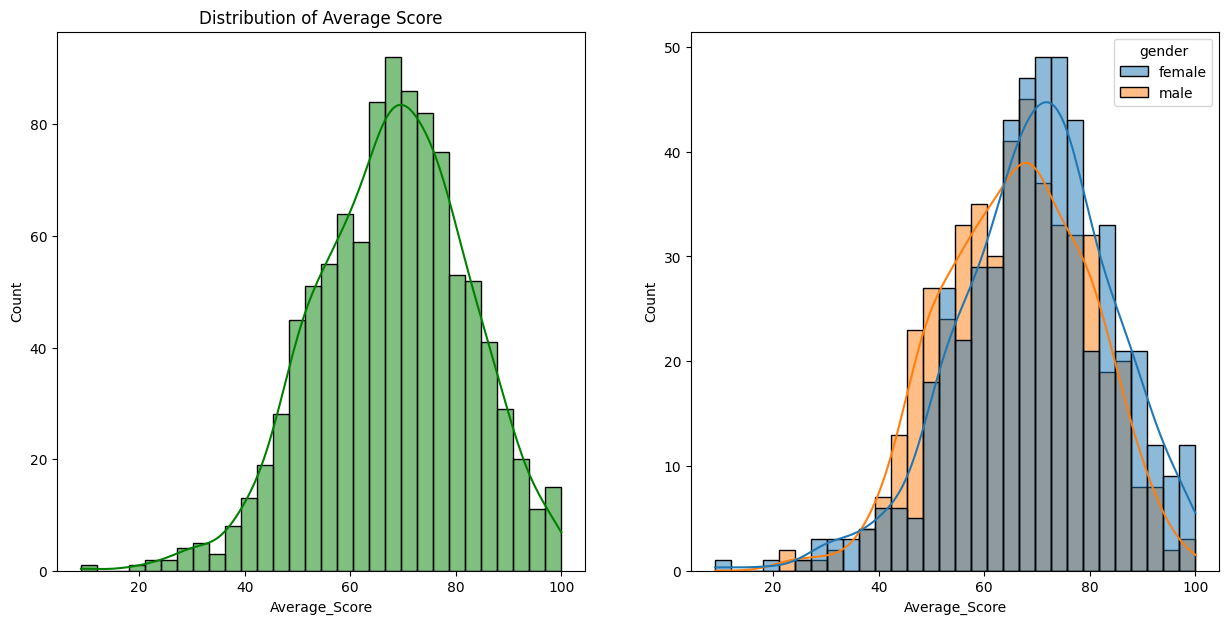

In [39]:
fig , ax = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data =df, x= 'Average_Score', bins=30, kde= True, color= 'g')
plt.title('Distribution of Average Score')
plt.subplot(122)
sns.histplot(data =df, x= 'Average_Score', bins=30, kde= True,hue='gender', color= 'g')
plt.show()

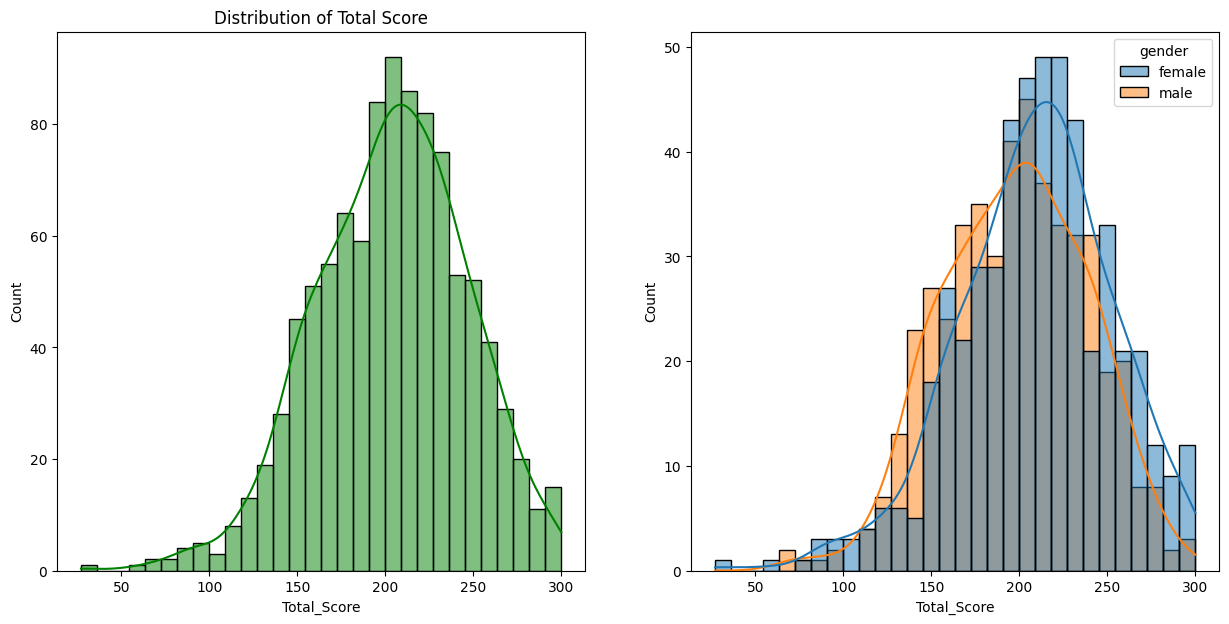

In [40]:
fig , ax = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data =df, x= 'Total_Score', bins=30, kde= True, color= 'g')
plt.title('Distribution of Total Score')
plt.subplot(122)
sns.histplot(data =df, x= 'Total_Score', bins=30, kde= True,hue='gender', color= 'g')
plt.show()

### Insights:
Female Students tends to perform better than male students

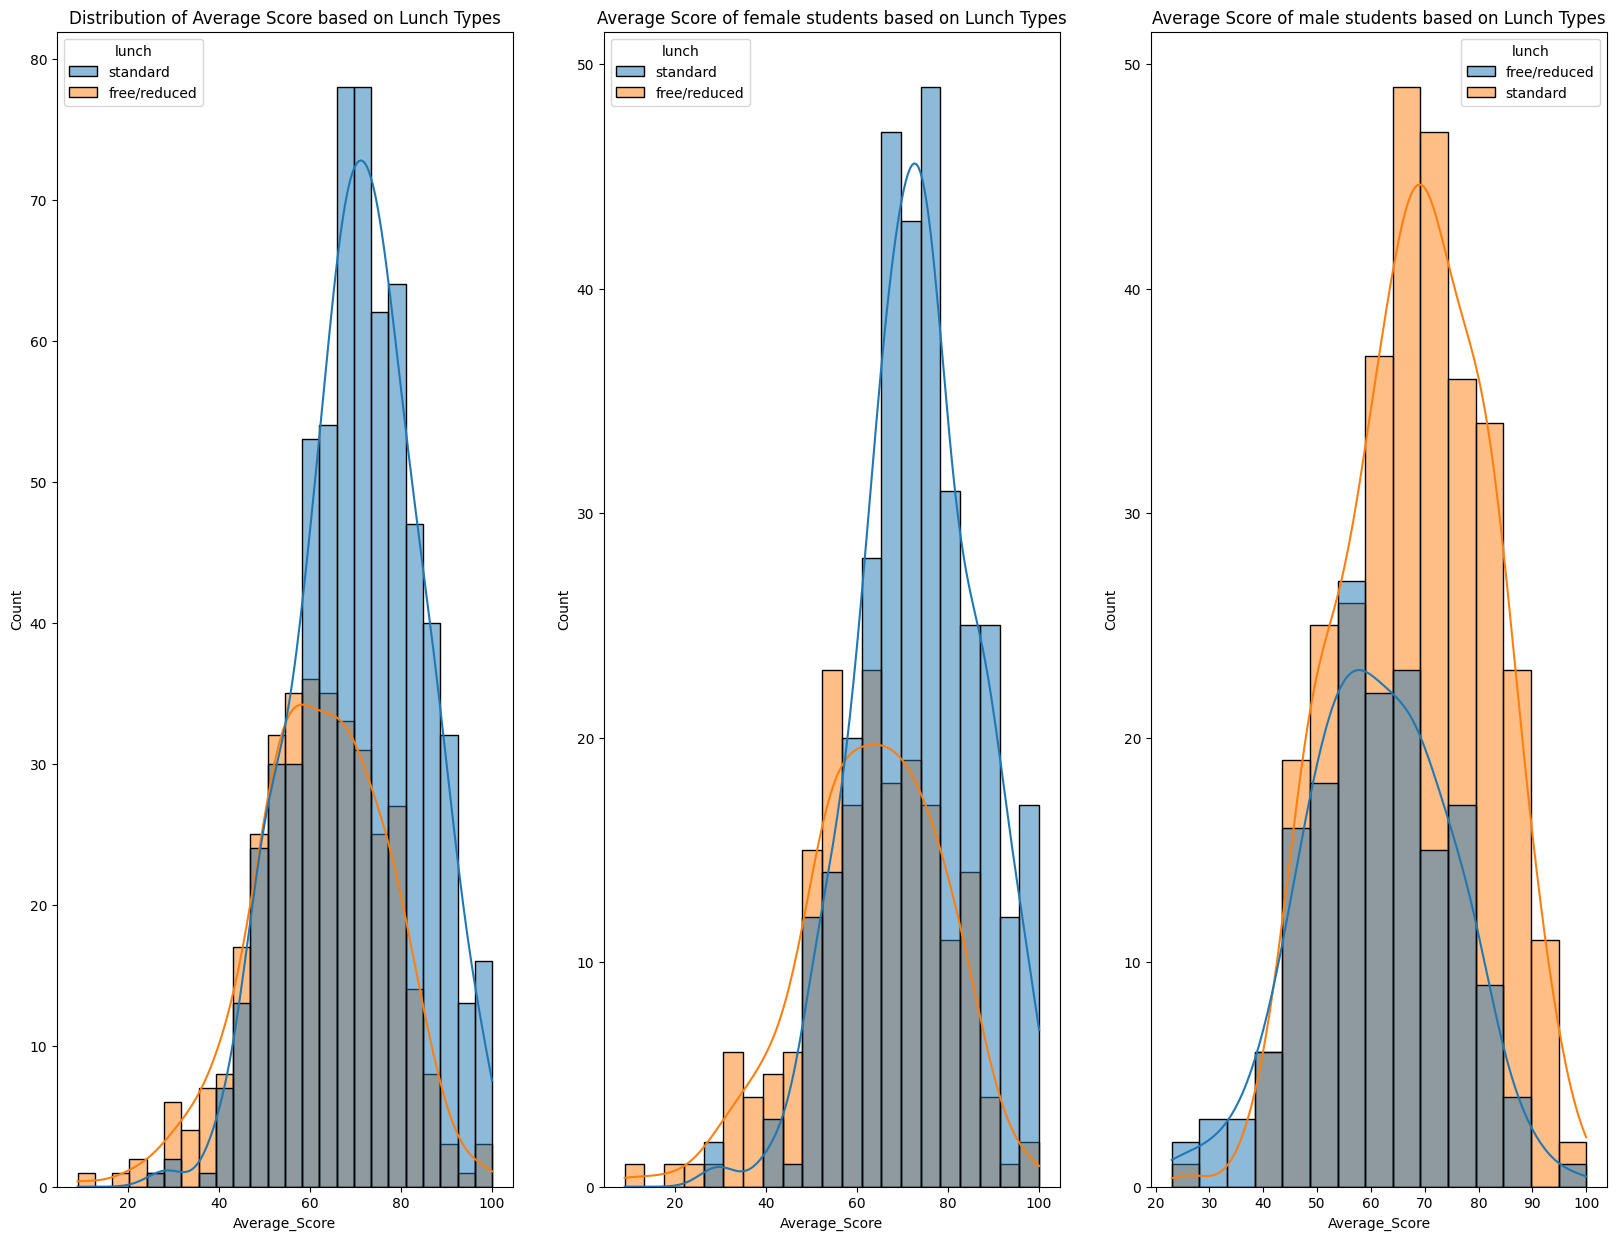

In [47]:
fig, ax = plt.subplots(1,3, figsize = (20,15))
plt.subplot(131)
sns.histplot(data = df, x='Average_Score', hue='lunch',kde=True)
plt.title('Distribution of Average Score based on Lunch Types')
plt.subplot(132)
sns.histplot(data = df[df.gender =='female'], x='Average_Score', hue='lunch',kde=True)
plt.title('Average Score of female students based on Lunch Types')
plt.subplot(133)
sns.histplot(data = df[df.gender =='male'], x='Average_Score', hue='lunch',kde=True)
plt.title('Average Score of male students based on Lunch Types')
plt.show()


### Insights:
Students with Standard Lunch performs better than free/reduced lunch

In [48]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

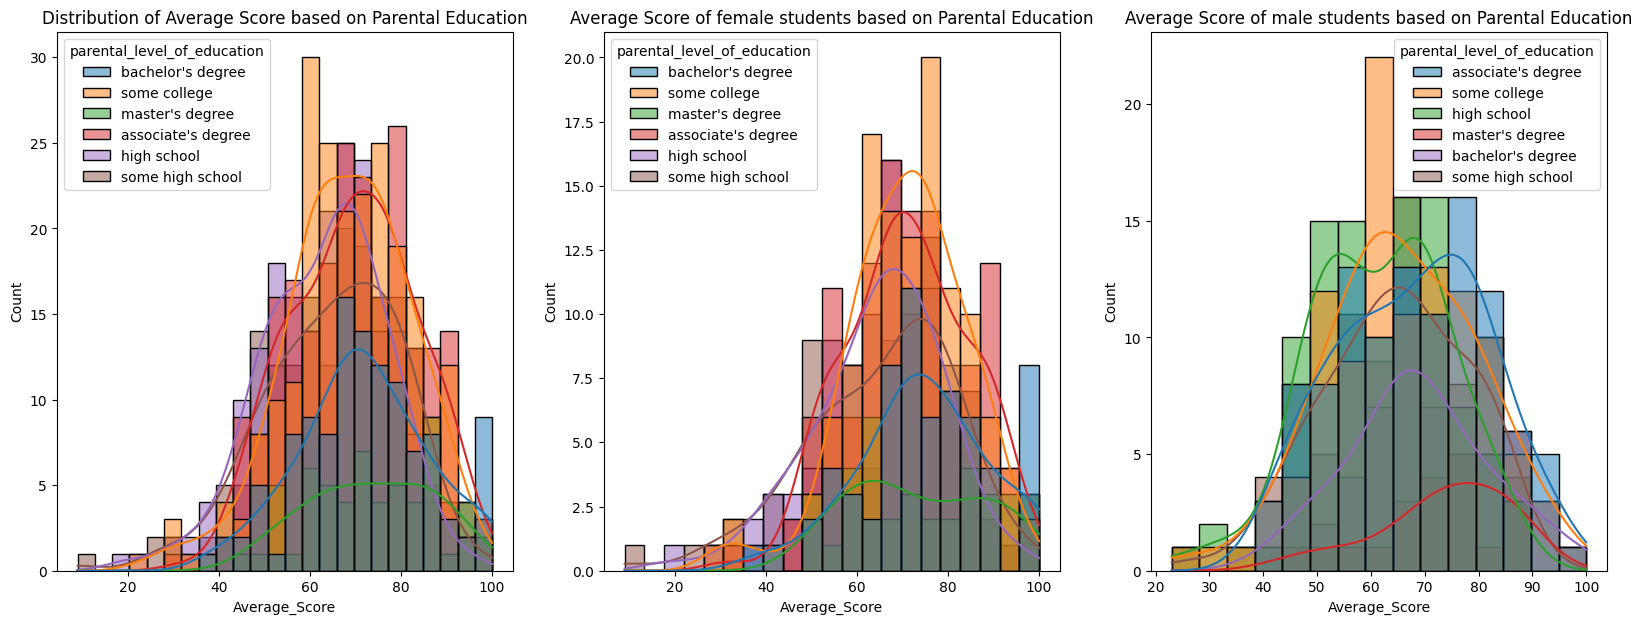

In [50]:
fig, ax = plt.subplots(1,3, figsize = (20,7))
plt.subplot(131)
sns.histplot(data = df, x='Average_Score', hue='parental_level_of_education',kde=True)
plt.title('Distribution of Average Score based on Parental Education')
plt.subplot(132)
sns.histplot(data = df[df.gender =='female'], x='Average_Score', hue='parental_level_of_education',kde=True)
plt.title('Average Score of female students based on Parental Education')
plt.subplot(133)
sns.histplot(data = df[df.gender =='male'], x='Average_Score', hue='parental_level_of_education',kde=True)
plt.title('Average Score of male students based on Parental Education')
plt.show()

### Insights:
- Generally Parental Education does not really help the students perform better in examination
- In case of male students with parental education with master and associate degree perform better in examination


In [52]:
df.race_ethnicity.value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

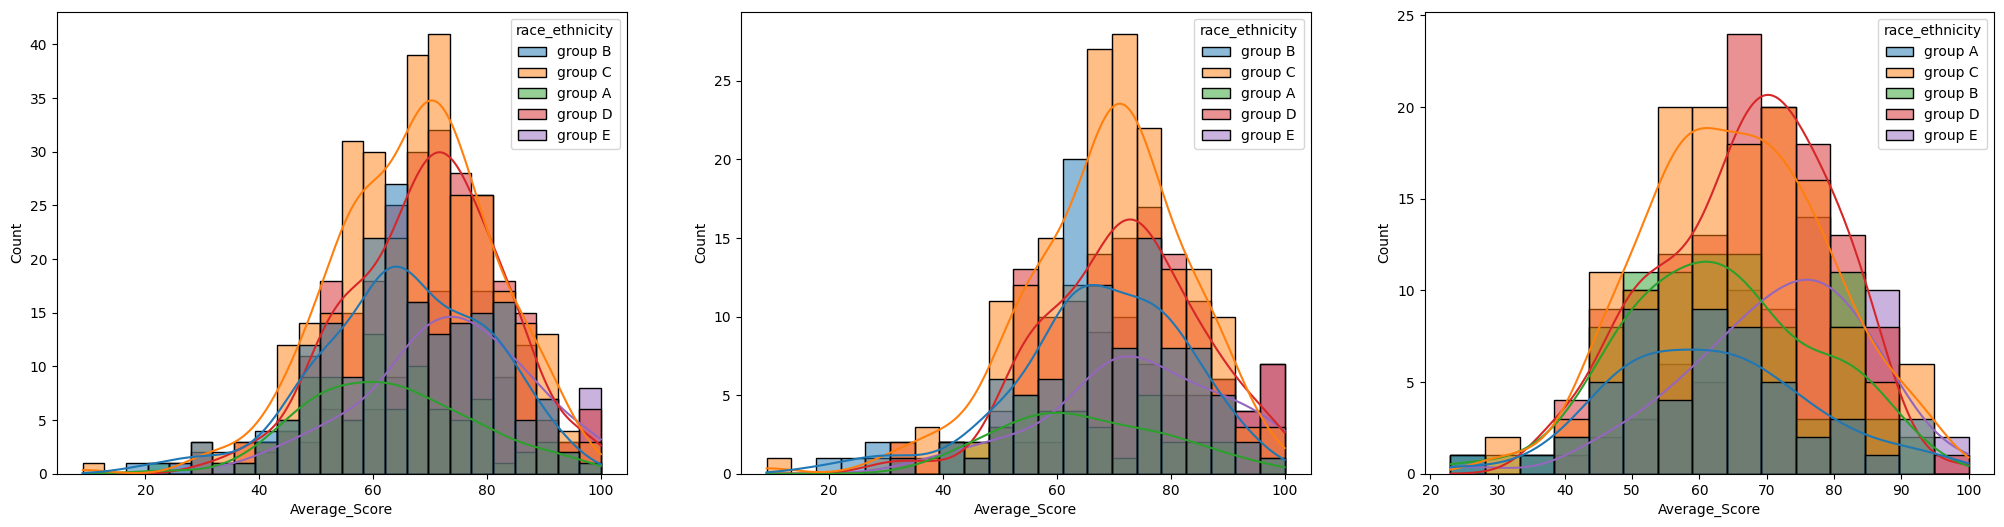

In [56]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='Average_Score',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='Average_Score',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='Average_Score',kde=True,hue='race_ethnicity')
plt.show()

#### Insights:
- Group A & B Tends to Perform Poor in the examination
- The same trend can be observed both in case of male and female students

In [57]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


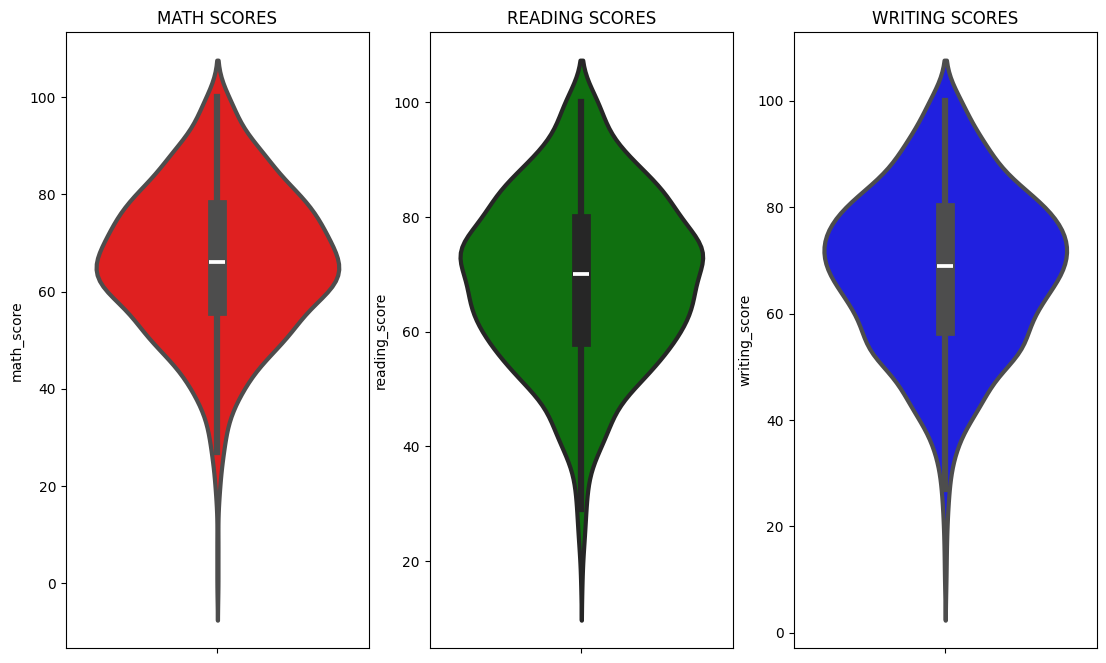

In [61]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights:
- It is observed that in Maths & writing most students score between 60- 80 range
- For Reading the score lies in the range of 50-80
- Average score is highest in case of Writing

In [62]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Multivariate Analysis Using Pieplot

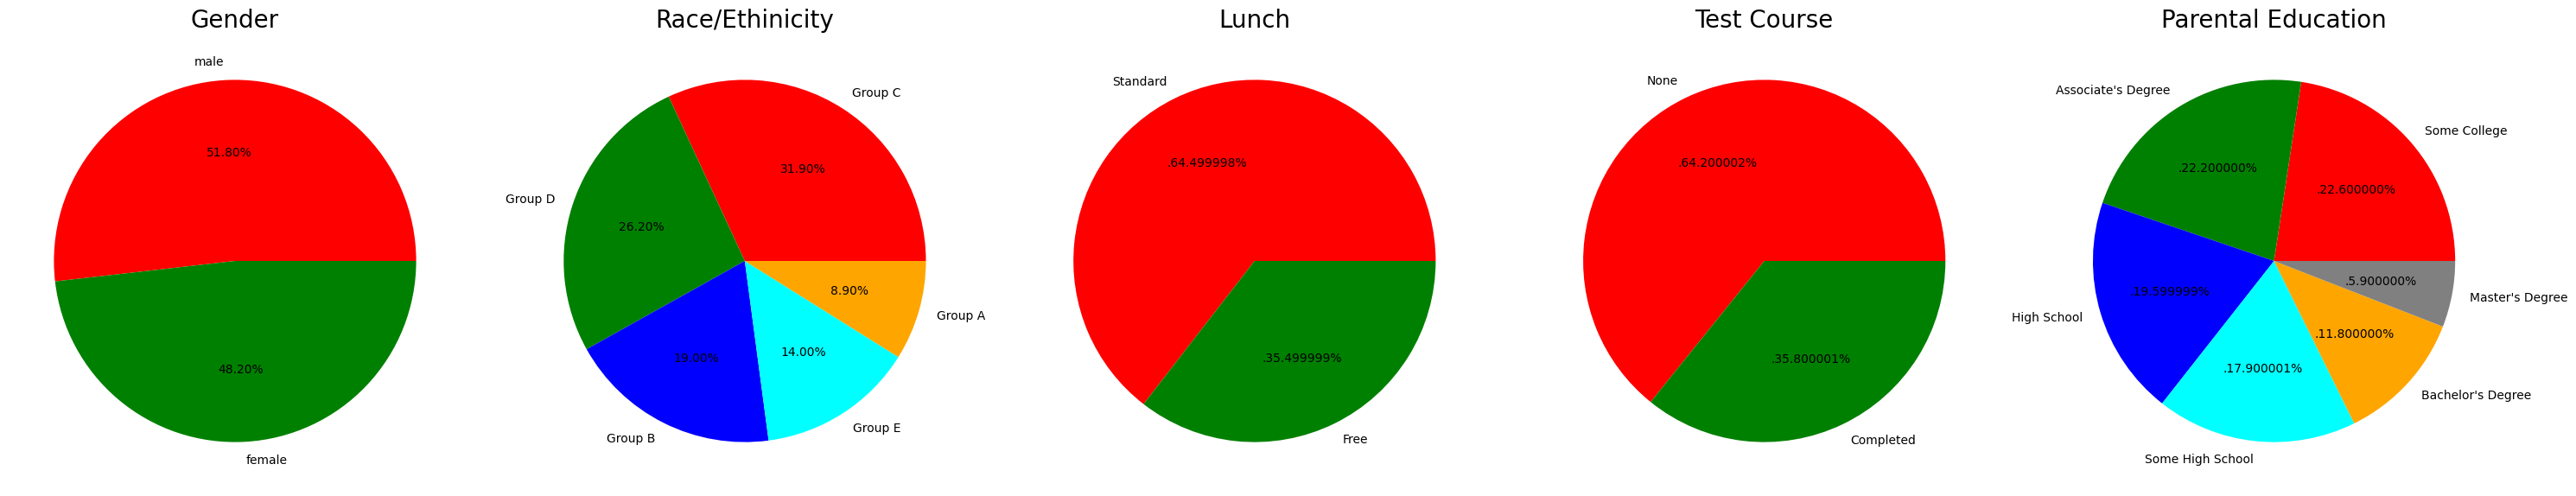

In [75]:
plt.rcParams['figure.figsize'] = [30,12]

plt.subplot(1,5,1)
size = df.gender.value_counts()
labels = ['male','female']
colors = ['red','green']

plt.pie(x=size, labels=labels, colors=colors, autopct='%1.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D','Group B','Group E','Group A']
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(x=size, labels=labels, colors=color, autopct='%1.2f%%')
plt.title('Race/Ethinicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free']
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = ['None', 'Completed']
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = ['Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"]
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()




#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

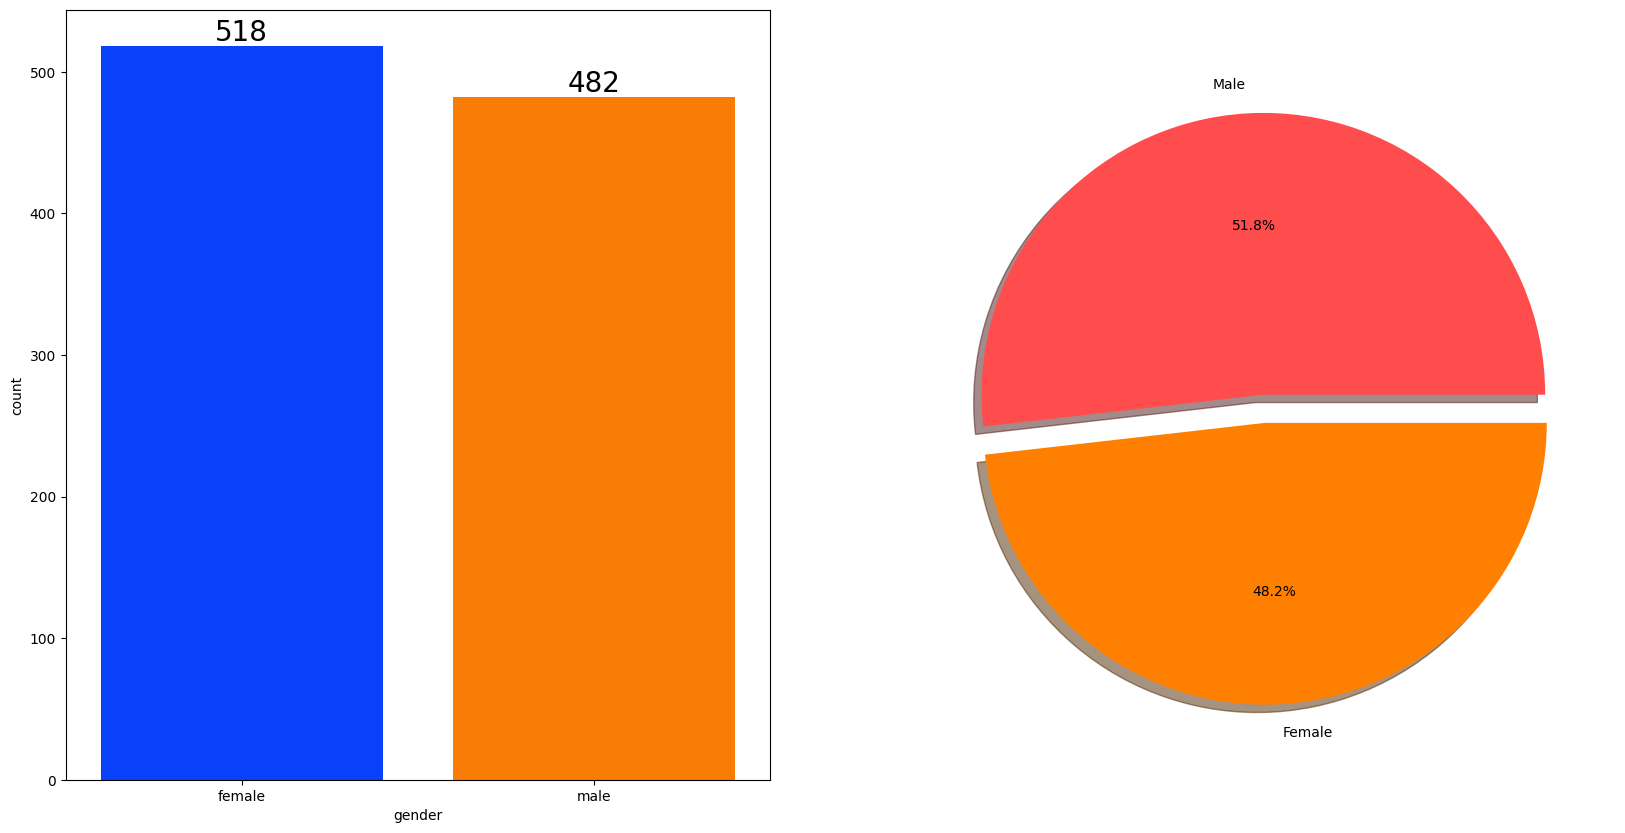

In [76]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [85]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [92]:
df.groupby('gender')['math_score'].mean()


gender
female    63.633205
male      68.728216
Name: math_score, dtype: float64

In [93]:
df.groupby('gender')['reading_score'].mean()

gender
female    72.608108
male      65.473029
Name: reading_score, dtype: float64

In [94]:
df.groupby('gender')['writing_score'].mean()

gender
female    72.467181
male      63.311203
Name: writing_score, dtype: float64

### Insights:
- On an average Male students perform better in maths.
- On an average Female students perform better in reading and writing 